In [1]:
# install dependencies
import pandas as pd  # to extract the data
import seaborn as sns # for exploratory analysis - to check relationship between variables.
import numpy as np

In [2]:
house_data = pd.read_csv("C:/Users/saich/Desktop/Janani/Projects/Predictive analysis_python/house_data.csv")

In [3]:
# data exploration
# house_data.head() # first 5 rows.
# house_data.columns  
# house_data.shape
# house_data.describe()

In [4]:
# data cleaning 
# if any null values we remove it 
# if more null values then replace them with mean (we can find mean from house_data.describe())
# house_data.isnull().sum() # check for null values

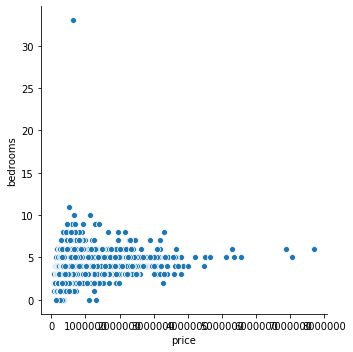

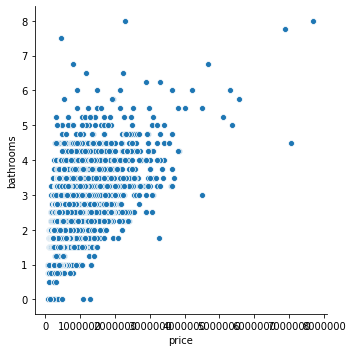

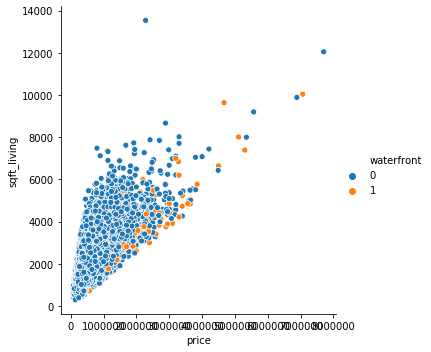

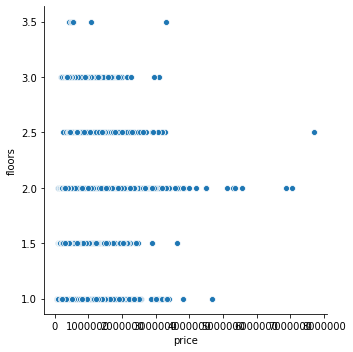

In [5]:
sns.relplot(x='price',y='bedrooms',data=house_data)  #describes relationship between price and bedrooms
sns.relplot(x='price',y='bathrooms',data=house_data)
# hue - shows differentiation ---> houses with waterfront are shown in orange color 
sns.relplot(x='price',y='sqft_living', hue='waterfront', data=house_data) #linear relationship - with each sqft price is increasing
sns.relplot(x='price',y='floors',data=house_data)

In [6]:
# data modeling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [28]:
# segregate data into training and test set

# training set - removing elements not necessary
# axis in train_set = Whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’).
train_set = house_data.drop(['id', 'price', 'date'], axis = 1) # price needs to be in test dataset to predict. Id and date are not needed

# The test dataset is a dataset used to provide an unbiased evaluation of a final model fit on the training dataset.
# By using similar data for training and testing, you can minimize the effects of data discrepancies and better understand--
# -- the characteristics of the model. After a model has been processed by using the training set, --
# -- you test the model by making predictions against the test set.
# test set 
test_set = house_data['price']
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [22]:
# The train_test_split function is for splitting a single dataset for two different purposes: training and testing.
# The training subset is for building your model.
# The testing subset is for using the model on unknown data to evaluate the performance of the model.
# test_size - should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split.
X_train, X_test, Y_train, Y_test = train_test_split(train_set, test_set, test_size=0.3, random_state=2)

6484

In [16]:
regr = LinearRegression().fit(X_train,Y_train) #fits a linear model

In [24]:
predict = regr.predict(X_test) # Predict using the linear model.
predict

In [25]:
# The best possible score is 1.0 
score = regr.score(X_test, Y_test) # Return the coefficient of determination R^2 of the prediction.
score

# Accuracy is 0.70

0.7069046794132006